# Bài tập 10 - Color segmentation với Machine Learning

Dùng thuật toán phân loại (Logistic regression) để tìm xem pixel nào là background, sau đó chuyển background sang màu trắng.

Input: 
- Ảnh background: (trong bài toán này ta dùng màu chroma Key)

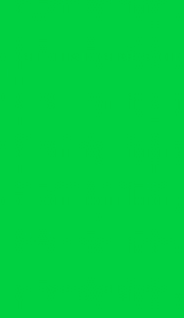

- Ảnh foreground: Ảnh bất kì không chứa màu của background.


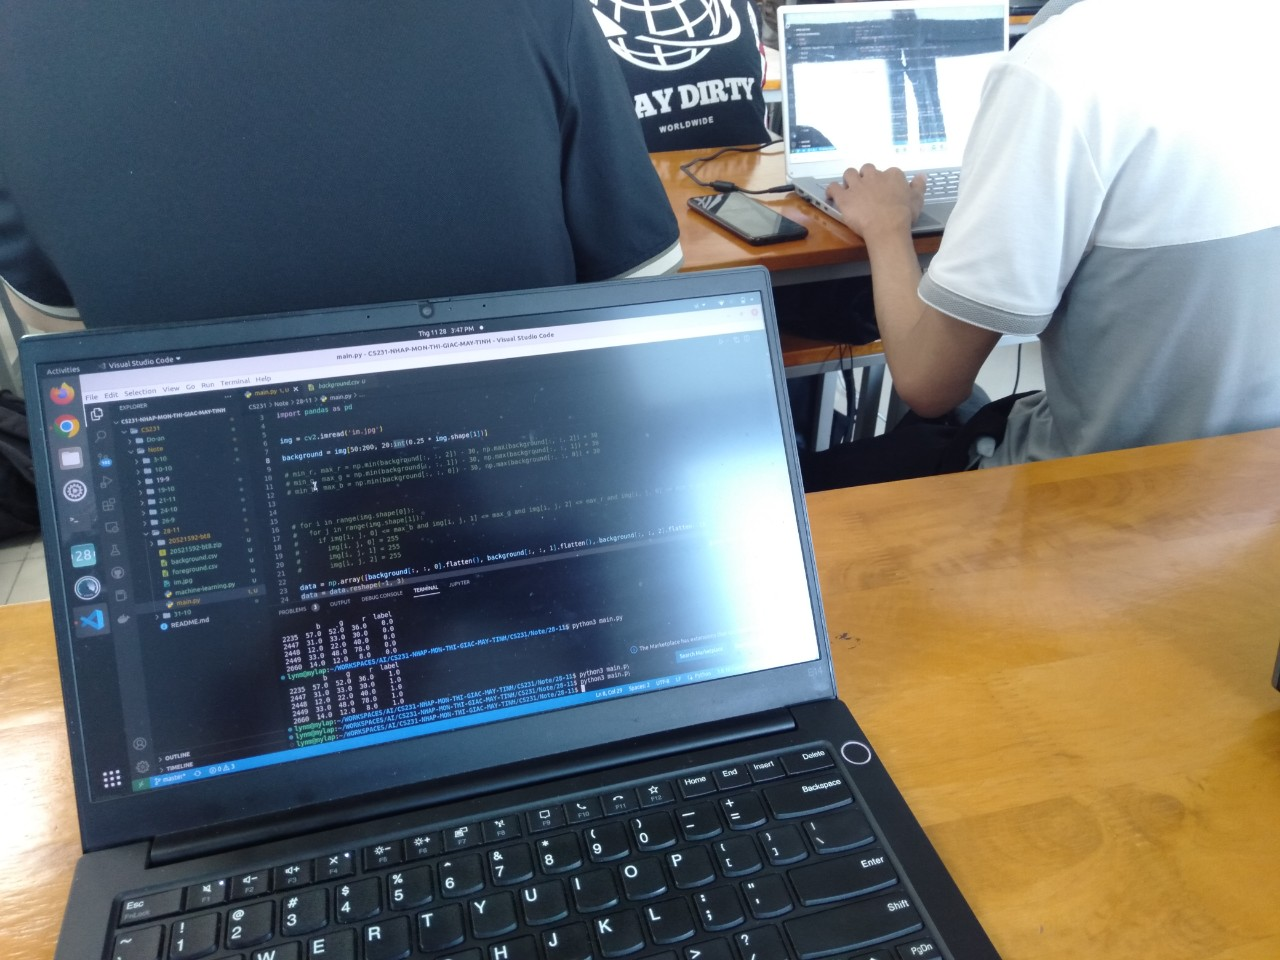

- Ảnh test: ảnh test xem chương trình remove background có hiệu quả không.

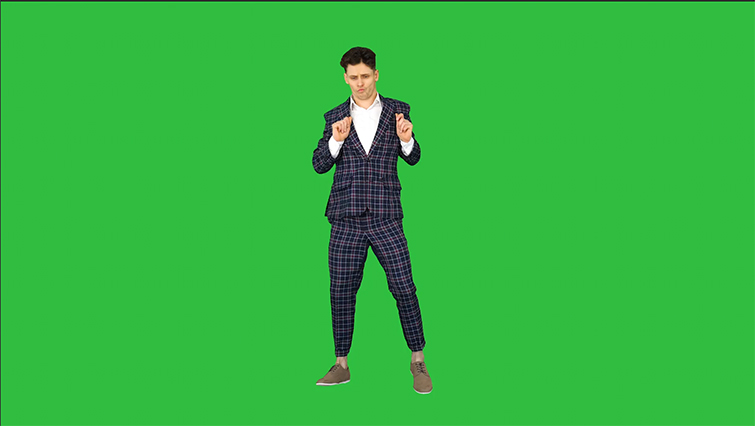

Output: 

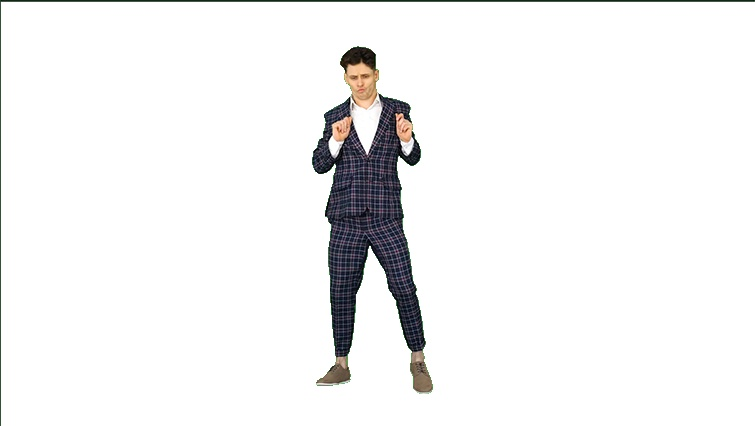

In [15]:
# from google.colab import drive
# drive.mount('/content/drive')

In [16]:
%cd /content/drive/MyDrive/MyDrive/UIT Documents/SUBJECTS/NHAP MON CV/notebook-cham-diem/Bai10

/content/drive/MyDrive/MyDrive/UIT Documents/SUBJECTS/NHAP MON CV/notebook-cham-diem/Bai10


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
def flatten(img_path):
  image = cv2.imread(img_path)
  final = np.array(image).flatten()
  final = final.reshape(-1, 3)
  return final

In [19]:
def sol(background_path, foreground_path, test_path):
  # 1. Doc anh & tao data de train
  # 2. train test split data
  # 3. Train model
  # 4. evaluate tren du lieu test
  # 5. predict anh test
  # 6. mapping background pixel thanh (255, 255, 255)


  ### BEGIN SOLUTION
  # 1. Doc anh & tao data de train
  data_background = flatten(background_path)
  data_foreground = flatten(foreground_path)

  X = np.concatenate((data_background, data_foreground), axis=0)
  y = np.concatenate((np.zeros((data_background.shape[0], 1)), np.ones((data_foreground.shape[0], 1))), axis=0) # background~0, foreground~1

  # 2. train test split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  # 3. Train model
  clf = LogisticRegression(random_state=0).fit(X_train, y_train)

  # 4. evaluate model
  f1_score_metric = f1_score(y_test, clf.predict(X_test))

  # 5. predict anh test
  test_img = cv2.imread(test_path)
  data_img = flatten(test_path)
  predict = clf.predict(data_img)
  predict = predict.reshape(-1, test_img.shape[1])

  # 6. mapping background pixel thanh (255, 255, 255)
  for i in range(test_img.shape[0]):
    for j in range(test_img.shape[1]):
      if predict[i, j] == 0:
        test_img[i, j, 0] = 255
        test_img[i, j, 1] = 255
        test_img[i, j, 2] = 255
  ### END SOLUTION
  print(f"Metric f1-score tren du lieu test: {f1_score_metric}")
  return test_img

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metric f1-score tren du lieu test: 1.0


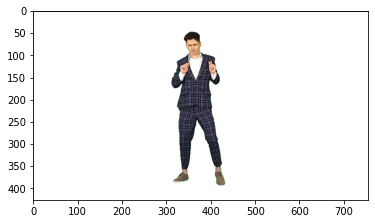

In [20]:
# test chuơng trình trên ảnh test
result = sol(background_path='background-testcase1.png', foreground_path='foreground-testcase1.jpg', test_path='testimg-testcase1.jpg')

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

In [21]:
# cham diem voi public test
def evaluate(img1, img2):
  img1 = img1.astype(np.int16)
  img2 = img2.astype(np.int16)
  return np.mean(np.abs(img1 - img2))/255. < 0.01
  
testcase = cv2.imread('result_testcase.jpg')
assert evaluate(result, testcase)

In [22]:
### BEGIN HIDDEN TESTS
def sol_for_test(background_path, foreground_path, test_path):
  # 1. Doc anh & tao data de train
  data_background = flatten(background_path)
  data_foreground = flatten(foreground_path)

  X = np.concatenate((data_background, data_foreground), axis=0)
  y = np.concatenate((np.zeros((data_background.shape[0], 1)), np.ones((data_foreground.shape[0], 1))), axis=0) # background~0, foreground~1

  # 2. train test split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  # 3. Train model
  clf = LogisticRegression(random_state=0).fit(X_train, y_train)

  # 5. predict anh test
  test_img = cv2.imread(test_path)
  data_img = flatten(test_path)
  predict = clf.predict(data_img)
  predict = predict.reshape(-1, test_img.shape[1])

  # 6. mapping background pixel thanh (255, 255, 255)
  for i in range(test_img.shape[0]):
    for j in range(test_img.shape[1]):
      if predict[i, j] == 0:
        test_img[i, j, 0] = 255
        test_img[i, j, 1] = 255
        test_img[i, j, 2] = 255

  return test_img

assert np.all(sol(background_path='background-testcase1.png', foreground_path='foreground-testcase1.jpg', test_path='testimg-testcase1.jpg') == sol_for_test(background_path='background-testcase1.png', foreground_path='foreground-testcase1.jpg', test_path='testimg-testcase1.jpg'))
### END HIDDEN TESTS

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Metric f1-score tren du lieu test: 1.0


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
